In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os, glob
!pip install pydicom
import pydicom
import pylab as pl
import sys
import matplotlib.path as mplPath
from matplotlib import pyplot as plt
from matplotlib import cm


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
print ('Files in Drive:')
!ls /content/drive/

Files in Drive:
'My Drive'


In [0]:
!git clone https://github.com/rashmi43/PneumoniaDetector

Cloning into 'PneumoniaDetector'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5708 (delta 0), reused 0 (delta 0), pack-reused 5705
Receiving objects: 100% (5708/5708), 81.20 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (892/892), done.


In [0]:
#Set your project path 
project_path = '/content/drive/My Drive/Colab Notebooks/CAPSTONE'
os.chdir(project_path)

In [0]:
print ('Files in Drive:')
!ls /content/drive/My\ Drive/Colab\ Notebooks/CAPSTONE

Files in Drive:
PneumoniaDetection.ipynb	 stage_2_train_images
stage_2_detailed_class_info.csv  stage_2_train_labels.csv


In [0]:
df=pydicom.read_file("./stage_2_train_images/0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm")
df.pixel_array

OSError: ignored

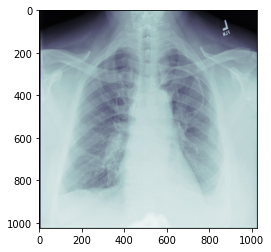

In [0]:
import matplotlib.pyplot as plt
import pydicom
filename = './stage_2_train_images/0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm'
ds = pydicom.dcmread(filename)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)


Filename.........: ./stage_2_train_images/0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name...: 0a0f6755-610d-4b7c-a460-5f5a8f5c0743, 
Patient id.......: 0a0f6755-610d-4b7c-a460-5f5a8f5c0743
Modality.........: CR
Study Date.......: 19010101
Image size.......: 1024 x 1024, 97240 bytes
Pixel spacing....: [0.168, 0.168]
Slice location...: (missing)


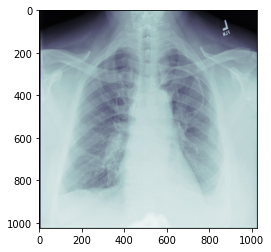

In [0]:
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [0]:
train_labels = pd.read_csv('./stage_2_train_labels.csv')

In [0]:
train_labels[train_labels['patientId'] == '00436515-870c-4b36-a041-de91049b9ab4']

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [0]:
df = pd.read_csv('./stage_2_detailed_class_info.csv')
df.shape

(30227, 2)

In [0]:
df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [0]:
result = pd.concat([df, train_labels], axis=1, sort=False)
result.head()

In [0]:
df[df['patientId'] == '0a0f91dc-6015-4342-b809-d19610854a21']

,patientId,class
757,0a0f91dc-6015-4342-b809-d19610854a21,Lung Opacity


In [0]:
name = '0a0f91dc-6015-4342-b809-d19610854a21'
if (df[df['patientId'] == name]['class'].values == 'Lung Opacity'):
    print(True)

True


In [0]:
df['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

There are 11821 cases who have a lung condition but its not pneumonia
There are 9555 cases who have lung opacity related to pneumonia
There are 8851 cases which not have any lung opacities

In [0]:
#directory = '../stage_2_train_images'
directory = os.path.join('/','content','drive', 'My Drive', 'Colab Notebooks','CAPSTONE','stage_2_train_images')
files_dir = os.listdir(directory)
print(len(files_dir))
images = []
i = 0
for names in files_dir:
    name = names.split('.')[0]
    if (df[df['patientId'] == name]['class'].values == 'Lung Opacity').any():
        print(names)
        images.append('./stage_2_train_images/'+names)
        i = i + 1
    if (i>10):
        break

print(images)

17680
49f0fa25-89cd-41a7-9c70-4d7d8d9be572.dcm
784a3ed0-2565-430f-819f-f713e1775344.dcm
0a825a59-c034-481c-b596-9c7f0bc42c2c.dcm
383e9756-7d45-4289-b35a-9fb2a5108e81.dcm
7fb3c5d0-81fd-46e3-9063-cd8d71831790.dcm
74ed4f73-33e6-4607-8842-57aec6c318c6.dcm
a410dbbd-1ee8-4b79-876e-200b093b0e43.dcm
b9a014f0-6ab0-449a-be4d-1911473dde10.dcm
3730cf87-f147-4872-8885-44700d3eacaf.dcm
0bbb1ff7-dba6-4d5b-affe-b3ca0050d965.dcm
6efd348c-705e-4e83-bbd1-97e336ee6b1e.dcm
['./stage_2_train_images/49f0fa25-89cd-41a7-9c70-4d7d8d9be572.dcm', './stage_2_train_images/784a3ed0-2565-430f-819f-f713e1775344.dcm', './stage_2_train_images/0a825a59-c034-481c-b596-9c7f0bc42c2c.dcm', './stage_2_train_images/383e9756-7d45-4289-b35a-9fb2a5108e81.dcm', './stage_2_train_images/7fb3c5d0-81fd-46e3-9063-cd8d71831790.dcm', './stage_2_train_images/74ed4f73-33e6-4607-8842-57aec6c318c6.dcm', './stage_2_train_images/a410dbbd-1ee8-4b79-876e-200b093b0e43.dcm', './stage_2_train_images/b9a014f0-6ab0-449a-be4d-1911473dde10.dcm', './sta

In [0]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(16, 16))
    for i in range(n+1):
        # Debug, plot figure
        f.add_subplot(5, 2, i+1)
        dataset = pydicom.dcmread(images[i])
        plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)

    plt.show(block=True)

ValueError: ignored

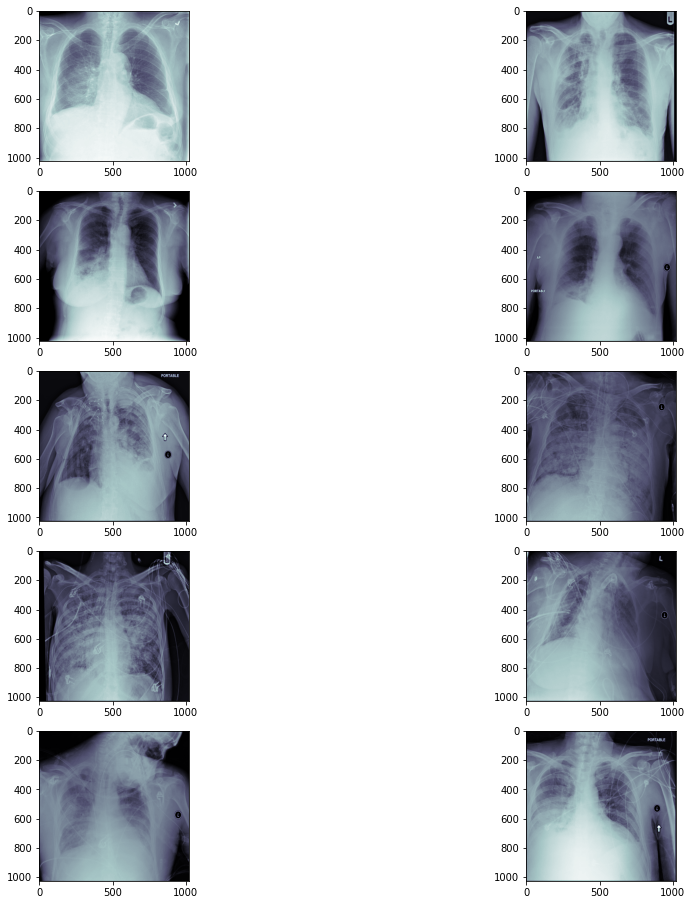

In [0]:
show_images(images)

In [0]:
filename = './stage_2_train_images/0a0f6755-610d-4b7c-a460-5f5a8f5c0743.dcm'
import matplotlib.patches as patches
ds = pydicom.dcmread(filename)
#plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(ds.pixel_array)
x = 264.0	
y = 152.0	
h = 213.0	
w = 379.0	
# Create a Rectangle patch
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()


NameError: ignored